Importing Necessary Library

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import requests

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Dataset

In [3]:
Data = pd.read_csv("/content/drive/MyDrive/Dataset/NLP Dataset/malicious_phish.csv")
Data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


There are 4 Categories which are
*   Benign - safe url
*   Defacement - Url that is meant to impersonate
*   Phising - url that is meant to take personal information
*   Malware - url that is meant to attack computer's security





In [4]:
Data.type.value_counts()

benign        428103
defacement     96457
phishing       94111
malware        32520
Name: type, dtype: int64

WordCloud for benign url

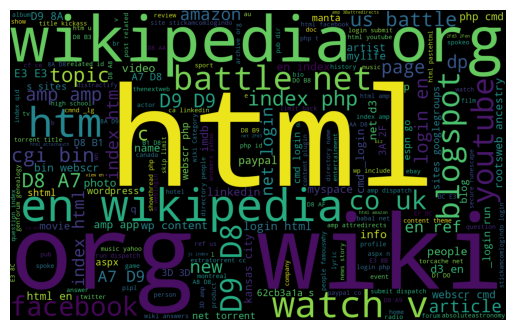

In [5]:
Data_benign = Data[Data.type == 'benign']
Data_benign_url = " ".join(i for i in Data_benign.url)
benign_wordcloud = WordCloud(width = 1600, height = 1000).generate(Data_benign_url)
plt.imshow(benign_wordcloud)
plt.axis("off")
plt.show()

WordCloud for defacement url

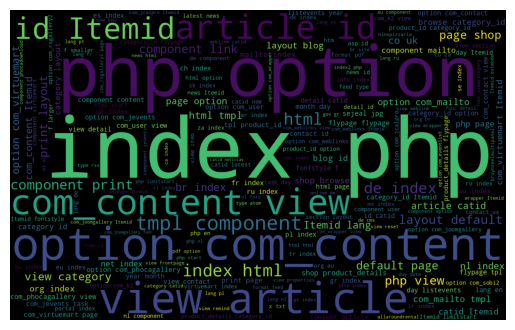

In [6]:
Data_defacement = Data[Data.type == 'defacement']
Data_defacement_url = " ".join(i for i in Data_defacement.url)
defacement_wordcloud = WordCloud(width = 1600, height = 1000).generate(Data_defacement_url)
plt.imshow(defacement_wordcloud)
plt.axis("off")
plt.show()

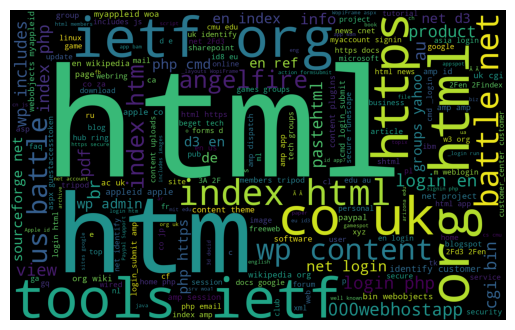

In [7]:
Data_phishing = Data[Data.type == 'phishing']
Data_phishing_url = " ".join(i for i in Data_phishing.url)
phishing_wordcloud = WordCloud(width = 1600, height = 1000).generate(Data_phishing_url)
plt.imshow(phishing_wordcloud)
plt.axis("off")
plt.show()

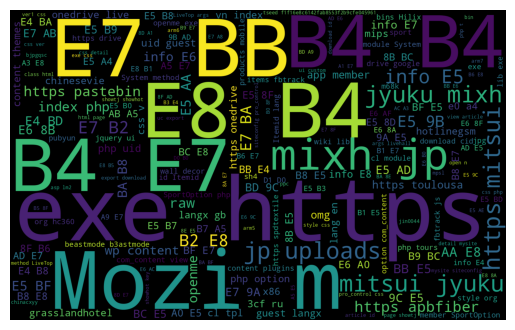

In [8]:
Data_malware = Data[Data.type == 'malware']
Data_malware_url = " ".join(i for i in Data_malware.url)
malware_wordcloud = WordCloud(width = 1600, height = 1000).generate(Data_malware_url)
plt.imshow(malware_wordcloud)
plt.axis("off")
plt.show()

Feature Extraction

Availability of IP address in url

In [9]:
ipv4_regex = "([2][0-5]{2}|[01]?\d{2}|[1-9]\d|\d)\.([2][0-5]{2}|[01]?\d{2}|[1-9]\d|\d)\.([2][0-5]{2}|[01]?\d{2}|[1-9]\d|\d)\.([2][0-5]{2}|[01]?\d{2}|[1-9]\d|\d)"
ipv6_regex = "(?:[a-f-A-F0-9]{1,4}\:){7}[a-f-A-F0-9]{1,4}"
ipv4_in_hexadecimal_regex = "(0x[a-fA-F0-9]{1,2})\.(0x[a-fA-F0-9]{1,2})\.(0x[a-fA-F0-9]{1,2})\.(0x[a-fA-F0-9]{1,2})"

def have_ip_address(url):
  match = re.search(
      ipv4_regex + "|"+ipv6_regex + "|"+ipv4_in_hexadecimal_regex,url)
  if match:
    return 1
  else:
    return 0

Data['have_ip_address'] = Data['url'].apply(lambda i : have_ip_address(i))


Url length

In [10]:
def url_length(url):
  return len(str(url))

Data['url_length'] = Data['url'].apply(lambda i: url_length(i))

Shortening Services - Work in Progress

In [11]:
import pandas as pd

# Specify the encoding when reading the CSV file
shortening_dataset = pd.read_csv("/content/drive/MyDrive/Dataset/Short-URL-Providers-Annotated.csv", encoding='latin1')

# Now you can continue working with the dataframe


In [12]:
shortening_url = shortening_dataset['FQDNS'].to_list()
shortening_url = [url[7:-1] for url in shortening_url]
first_part_url = [url for url in shortening_url if url[0]!='/']
second_part_url = [url.replace('/','') for url in shortening_url if url[0] == '/']
shortening_url = first_part_url + second_part_url
shortening_url = "|".join(url for url in shortening_url)
shortening_url = shortening_url.replace("t.co|","")
shortening_url = shortening_url.replace("a.co|","")
shortening_url = shortening_url.replace("x.co|","")
shortening_url = shortening_url.replace("apple.co|","apple.com")
shortening_url = shortening_url.replace("//?gtnjs=","")
shortening_url = shortening_url.replace("/cgi-sys/suspendedpage.cg","")
shortening_url = shortening_url.replace(".","\.")

In [13]:
def shortening_service(url):
  match = re.search(shortening_url,url)
  if match:
    return 1
  else:
    return 0
Data['shortening_service'] = Data['url'].apply(lambda i: shortening_service(i))

Count @ symbol

In [14]:
def countattratesymbol_url(url):
  return url.count('@')

Data['count@'] = Data['url'].apply(lambda i : countattratesymbol_url(i))

Finding http

In [15]:
def count_http_url(url):
  return url.count("http")

Data['count_http'] = Data['url'].apply(lambda i : count_http_url(i))

Finding https

In [16]:
def count_https_url(url):
  return url.count("https")

Data['count_https'] = Data['url'].apply(lambda i : count_https_url(i))

Counting dot

In [17]:
def count_dot_url(url):
  return url.count('.')

Data['countdot'] = Data['url'].apply(lambda i : count_dot_url(i))

Counting hyphen

In [18]:
def count_hyphen_url(url):
  return url.count('-')

Data['count-'] = Data['url'].apply(lambda i : count_hyphen_url(i))

Counting underline

In [19]:
def count_underline_url(url):
  return url.count('_')

Data['count_'] = Data['url'].apply(lambda i : count_underline_url(i))

Counting questionmark

In [20]:
def count_question_url(url):
  return url.count('?')

Data['count?'] = Data['url'].apply(lambda i : count_question_url(i))

Counting path

In [21]:
def count_slash_url(url):
  path = str(urlparse(url).path)
  return path.count('/')

Data['count_path'] = Data['url'].apply(lambda i : count_slash_url(i))

Counting equal symbol

In [22]:
def count_equal_url(url):
  return url.count('=')

Data['count='] = Data['url'].apply(lambda i: count_equal_url(i))

Counting & symbol

In [23]:
def count_amp_url(url):
  return url.count('&')

Data['count&'] = Data['url'].apply(lambda i: count_amp_url(i))

Counting exclamation symbol

In [24]:
def count_exclam_url(url):
  return url.count('!')

Data['count!'] = Data['url'].apply(lambda i: count_exclam_url(i))


Counting percent symbol

In [25]:
def count_percent_symbol(url):
  return url.count('%')

Data['count%'] = Data['url'].apply(lambda i: count_percent_symbol(i))

Count whitespace

In [26]:
def count_space(url):
  return url.count(" ")
Data['countspace'] = Data['url'].apply(lambda i: count_space(i))

Count comma

In [27]:
def count_comma(url):
  return url.count(",")
Data['countcomma'] = Data['url'].apply(lambda i: count_comma(i))

Count tilde

In [28]:
def count_tilde(url):
  return url.count("~")
Data['counttilde'] = Data['url'].apply(lambda i: count_tilde(i))

Count plus

In [29]:
def count_plus(url):
  return url.count("+")
Data['countplus'] = Data['url'].apply(lambda i: count_plus(i))

Count asterisk

In [30]:
def count_asterisk(url):
  return url.count("*")
Data['countasterisk'] = Data['url'].apply(lambda i: count_asterisk(i))

Count hashtag

In [31]:
def count_hashtag(url):
  return url.count("#")
Data['counthashtag'] = Data['url'].apply(lambda i: count_hashtag(i))

Count dollar

In [32]:
def count_dollar(url):
  return url.count("$")
Data['countdollar'] = Data['url'].apply(lambda i: count_dollar(i))

Find email

In [33]:
def find_email(url):
  match = re.search('\S+@\S+\.com',url)
  if match:
    return 1
  else:
    return 0
Data['emailexist'] = Data['url'].apply(lambda i : find_email(i))

In [34]:
Data.head()

,url,type,have_ip_address,url_length,shortening_service,count@,count_http,count_https,countdot,count-,...,count!,count%,countspace,countcomma,counttilde,countplus,countasterisk,counthashtag,countdollar,emailexist
0,br-icloud.com.br,phishing,0,16,0,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,88,0,0,1,0,3,1,...,0,0,0,0,0,0,0,0,0,0
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,235,0,0,1,0,2,1,...,0,0,0,0,0,0,0,0,0,0
